# New try here using simpy and optimize, starting with the cart example and coding everything new

## Reference of sympy functionality

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
# x, y, z = sympy.symbols("x y z")
# parameters = {"T":sympy.cos(3.4,evaluate=False)}
# def functest(x,y,c,params):
#     return x + x*y + params["T"]


# expr = sympy.Derivative(functest(x,y,z,parameters),x,evaluate=True) + 1

# func_eval = lambda func,b: func.evalf(subs={x:b,y:b})

# def func_test_2(q,params):
#     q_x, q_y = q
#     return params["T"]*q_x* q_y + 2* q_y + params["T"]


In [2]:
# testvec = np.array([x,y])
# expr_2 = sympy.Derivative(func_test_2(testvec,parameters),y)
# print(expr_2)
# expr_2.doit()

In [3]:
# from sympy import symbols, lambdify
# from sympy.parsing.sympy_parser import parse_expr
# import numpy as np

# xs = symbols('x1 x2')
# ks = symbols('k1 k2')
# strs = ['-k1 * x1**2 + k2 * x2', 'k1 * x1**2 - k2 * x2']
# syms = [parse_expr(item) for item in strs]

# # Convert each expression in syms to a function with signature f(x1, x2, k1, k2):
# funcs = [lambdify(xs + ks, f) for f in syms]


# # This is not exactly the same as the `my_odes` in the question.
# # `t` is included so this can be used with `scipy.integrate.odeint`.
# # The value returned by `sym.subs` is wrapped in a call to `float`
# # to ensure that the function returns python floats and not sympy Floats.
# def my_odes(x, t, k):
#     all_dict = dict(zip(xs, x))
#     all_dict.update(dict(zip(ks, k)))
#     return np.array([float(sym.subs(all_dict)) for sym in syms])

# def lambdified_odes(x, t, k):
#     x1, x2 = x
#     k1, k2 = k
#     xdot = [f(x1, x2, k1, k2) for f in funcs]
#     return xdot


# if __name__ == "__main__":
#     from scipy.integrate import odeint

#     k1 = 0.5
#     k2 = 1.0
#     init = [1.0, 0.0]
#     t = np.linspace(0, 1, 6)
#     sola = odeint(lambdified_odes, init, t, args=((k1, k2),))
#     solb = odeint(my_odes, init, t, args=((k1, k2),))
#     print(np.allclose(sola, solb))

# Helper functions

In [2]:
def weighted_sum(x1,x2,weight):
    return weight * x1 + (1-weight)*x2

def finite_diff(x1,x2,step_size):
    return (x2-x1)/step_size


# Solving simple driven cart OCP
1D Problem

In [3]:

# u,v = sympy.var('u v')
# x = (2 + sympy.sin(u) *sympy.sin(v)) *sympy.sin(3*v/2) 
# y = sympy.cos(u) *sympy.sin(v) + 2 *v/sympy.pi - 2 
# z = (2 + sympy.sin(u) *sympy.sin(v)) *sympy.cos(3*v/2)
   # everything so far was as in your code 
# vec =sympy.Matrix([u,v])
# print(vec)
# print(vec.transpose().multiply(vec))    # "pretty" print
# print(sympy.Matrix([u]))
# def functest(vec):
#    a,b = vec
#    return a+b

# sympy.Derivative(functest(vec),"u",evaluate=True)

In [4]:
import sympy
import numpy as np
import scipy.optimize as opt
# x = sympy.symbols("x")
# v_x = sympy.symbols("v_x")
# q = sympy.Matrix([x])

OCP_parameters = {
    "m1":10.,  # kg
    "Aq": 50., #  kg/s^2
    "Adq": 50., # kg/s
    "q0": sympy.Matrix([0.]),        #(m,1)
    "dq0": sympy.Matrix([0.]),       #(m/s,1/s)
    "qT": sympy.Matrix([1.]),   #(m,1)
    "dqT": sympy.Matrix([0.]),       #(m/s,1/s)
    "alpha": 0.5,
    "gamma": 0.5,  
    "T": 16.,   #s
    "N": 40,
    "dim_q": 1,  # (x)
    "dim_u": 1,  
}

OCP_parameters["h"] = OCP_parameters["T"]/ OCP_parameters["N"]
OCP_parameters["times"] = sympy.Matrix([i*OCP_parameters["h"] for i in range(OCP_parameters["N"]+1)])


OCP_parameters_np_version = {}
OCP_parameters_np_version["m1"] = OCP_parameters["m1"]
OCP_parameters_np_version["Aq"] = OCP_parameters["Aq"]
OCP_parameters_np_version["Adq"] = OCP_parameters["Adq"]
OCP_parameters_np_version["alpha"] = OCP_parameters["alpha"]
OCP_parameters_np_version["gamma"] = OCP_parameters["gamma"]
OCP_parameters_np_version["T"] = OCP_parameters["T"]
OCP_parameters_np_version["N"] = OCP_parameters["N"]
OCP_parameters_np_version["dim_q"] = OCP_parameters["dim_q"]
OCP_parameters_np_version["dim_u"] = OCP_parameters["dim_u"]
OCP_parameters_np_version["q0"] = np.array([np.float64(OCP_parameters["q0"].values()[0])])
OCP_parameters_np_version["dq0"] = np.array([np.float64(OCP_parameters["dq0"].values()[0])])
OCP_parameters_np_version["dqT"] = np.array([np.float64(OCP_parameters["dqT"].values()[0])])
OCP_parameters_np_version["qT"] = np.array([np.float64(OCP_parameters["qT"].values()[0])])
OCP_parameters_np_version["h"] = OCP_parameters_np_version["T"]/ OCP_parameters_np_version["N"]
OCP_parameters_np_version["times"] = np.array([i*OCP_parameters_np_version["h"] for i in range(OCP_parameters_np_version["N"]+1)])

print('higher dimension not implemented here yet')





# v = sympy.Matrix([v_x])
q = sympy.symbols("x,")     #position
v_q = sympy.symbols("v_x,") #velocity
a_q = sympy.symbols("a_x,")  #acceleration
u = sympy.symbols("u,")




#TEsting variables, not relevant otherwise
v_q_vec = sympy.Matrix([v_q]).transpose()
q_vec = sympy.Matrix([q]).transpose()
a_q_vec = sympy.Matrix([a_q]).transpose()
u_vec = sympy.Matrix([u]).transpose()


Ua_k = sympy.Matrix(sympy.symbols("U_a_k,"))
Ua_k_1 = sympy.Matrix(sympy.symbols("U_a_km1,"))
Ub_k = sympy.Matrix(sympy.symbols("U_b_k,"))
Ub_k_1 = sympy.Matrix(sympy.symbols("U_b_km1,"))

q_k = sympy.Matrix(sympy.symbols("x_k,")  )   #position
q_k_1 = sympy.Matrix(sympy.symbols("x_km1,") )    #position
q_k1 = sympy.Matrix(sympy.symbols("x_k1,") )    #position
v_q_k = sympy.Matrix(sympy.symbols("v_x_k,")) #velocity
v_q_k1 = sympy.Matrix(sympy.symbols("v_x_k1,")) #velocity
v_q_k_1 = sympy.Matrix(sympy.symbols("v_x_km1,")) #velocity

higher dimension not implemented here yet


## Defining the mechanical system

In [5]:
def mech_Lagrangian(q,v,params):
    m1 = params["m1"]
    q_x, = q
    v_x, = v
    # return q_x**2 + q_y**2 + q_x**2*q_y**2
    return m1 * (v_x)**2 / 2 
#use func always for the evaluated sympy symbol 
# (probably classes would be better/more natural here)
mech_Lagrangian_func = mech_Lagrangian(q,v_q,OCP_parameters)
mech_Lagrangian_lambda_func = sympy.lambdify(q+v_q,mech_Lagrangian_func)


def f_L(q,v,u,params):
    control_force = sympy.Matrix([u])
    return control_force # since 1-dimensional
f_L_func = f_L(q,v_q,u,OCP_parameters)
f_L_lambda_func = sympy.lambdify(q+v_q+u,mech_Lagrangian_func)



Dq_L_mech = sympy.derive_by_array(mech_Lagrangian_func, q)
Dv_L_mech = sympy.derive_by_array(mech_Lagrangian_func, v_q)
Dvv_L_mech_chain  = sympy.derive_by_array(Dv_L_mech,v_q).tomatrix()@ a_q_vec
Dvq_L_mech_chain  = sympy.derive_by_array(Dq_L_mech,q).tomatrix()@ v_q_vec

EL_mech  =  Dvv_L_mech_chain + Dvq_L_mech_chain - sympy.Matrix(Dq_L_mech) - sympy.Matrix(f_L_func)
EL_mech_lambda = sympy.lambdify(q+v_q+a_q+u, EL_mech)


# def mech_Lagrangian(q,v,params):
#     m1 = params["m1"]
#     q_x,q_y = q
#     v_x,v_y = v
#     # return q_x**2 + q_y**2 + q_x**2*q_y**2
#     return m1 * (v_x**2+v_y**2) / 2 
def mech_p(q,v,params):
    return sympy.Matrix(sympy.derive_by_array(mech_Lagrangian(q,v,params),v))

# q = sympy.Matrix(sympy.symbols("x,y"))
# v_q = sympy.Matrix(sympy.symbols("v_x,v_y"))
p_mech = sympy.Matrix(sympy.symbols("p_x,"))
p_mech_as_v = mech_p(q,v_q,OCP_parameters)
v_as_p_mech = sympy.solve([p_mech[i]-p_mech_as_v[i] for i in range(len(p_mech))], v_q)
inverse_Legendre_v = sympy.Matrix([v_as_p_mech[arg] for arg in v_q])


def discrete_Lagrangian(qk,qk1,params):
    gamma = params["gamma"]
    alpha= params["alpha"]
    weighted_q_g = weighted_sum(qk,qk1,gamma)
    weighted_q_1g = weighted_sum(qk,qk1,1-gamma)
    step_size= params["h"]
    finite_diff_q = finite_diff(qk,qk1,step_size)
    result = step_size* alpha*mech_Lagrangian(weighted_q_g,finite_diff_q,params)
    result += step_size* (1-alpha)*mech_Lagrangian(weighted_q_1g,finite_diff_q,params)
    return result

def discrete_f_L_p(qk,qk1,uka,ukb,params):
    gamma = params["gamma"]
    alpha= params["alpha"]
    weighted_q_g = weighted_sum(qk,qk1,gamma)
    weighted_q_1g = weighted_sum(qk,qk1,1-gamma)
    step_size= params["h"]
    finite_diff_q = finite_diff(qk,qk1,step_size)
    result = step_size * alpha * (1-gamma) * f_L(weighted_q_g,finite_diff_q,uka,params) 
    result += step_size * (1-alpha) *gamma * f_L(weighted_q_1g,finite_diff_q,ukb,params) 
    return result

def discrete_f_L_m(qk,qk1,uka,ukb,params):
    gamma = params["gamma"]
    alpha= params["alpha"]
    weighted_q_g = weighted_sum(qk,qk1,gamma)
    weighted_q_1g = weighted_sum(qk,qk1,1-gamma)
    step_size= params["h"]
    finite_diff_q = finite_diff(qk,qk1,step_size)
    result = step_size * alpha * gamma * f_L(weighted_q_g,finite_diff_q,uka,params) 
    result += step_size * (1-alpha) *(1-gamma) * f_L(weighted_q_1g,finite_diff_q,ukb,params) 
    return result


p_k_m = -  sympy.derive_by_array(discrete_Lagrangian(q_k,q_k1,OCP_parameters),q_k).tomatrix()
p_k_m -= discrete_f_L_m(q_k,q_k1,Ua_k,Ub_k,OCP_parameters)
p_k_p = sympy.derive_by_array(discrete_Lagrangian(q_k_1,q_k,OCP_parameters),q_k).tomatrix()
p_k_p += discrete_f_L_p(q_k_1,q_k,Ua_k_1,Ub_k_1,OCP_parameters)
forced_DEL = -p_k_m + p_k_p
all_elements = list(q_k_1) + list(q_k) + list(q_k1) +list(Ua_k_1) + list(Ua_k) 
all_elements += list(Ub_k_1) + list(Ub_k)
forced_DEL_lambdified = sympy.lambdify(all_elements,forced_DEL)

calc_next_q_val_from_v = sympy.Matrix([sympy.solve([p_k_m[i] - p_mech_as_v[i] for i in range(len(p_k_m))],q_k1)[arg] for arg in q_k1])
all_elements = list(v_q) +list(q_k)  + list(Ua_k) + list(Ub_k) 
calc_next_q_val_from_v_lambdified = sympy.lambdify(all_elements,calc_next_q_val_from_v)

In [6]:
v_m_as_discrete_q = sympy.Matrix([v_as_p_mech[x]  for x in v_q]).evalf(subs={x:y for (x,y) in zip(p_mech,p_k_m)})
v_p_as_discrete_q = sympy.Matrix([v_as_p_mech[x]  for x in v_q]).evalf(subs={x:y for (x,y) in zip(p_mech,p_k_p)})

v_m_calc_lambdify = sympy.lambdify(list(q_k)+list(q_k1)+list(Ua_k)+list(Ub_k) ,v_m_as_discrete_q)
v_p_calc_lambdify = sympy.lambdify(list(q_k_1)+list(q_k)+list(Ua_k_1)+list(Ub_k_1) ,v_p_as_discrete_q)

def calc_velocities_from_discrete_sol(q_d, Ua_d,Ub_d,params):
    '''assumed already working with numpy arrays'''
    v_d = []
    N_val = params["N"]
    for i in range(N_val):
        v_d.append(v_m_calc_lambdify(*q_d[i],*q_d[i+1], *Ua_d[i],*Ub_d[i]))
    v_d.append(v_p_calc_lambdify(*q_d[N_val-1],*q_d[N_val], *Ua_d[N_val-1],*Ub_d[N_val-1]))
    return np.array(v_d).reshape([-1,1])


In [7]:
# discrete_Lagrangian(q_d[0],q_d[1],OCP_parameters)


# forced_DEL = sympy.derive_by_array(discrete_Lagrangian(q_k,q_k1,OCP_parameters),q_k).tomatrix()
# forced_DEL += sympy.derive_by_array(discrete_Lagrangian(q_k_1,q_k,OCP_parameters),q_k).tomatrix()
# forced_DEL += discrete_f_L_m(q_k,q_k1,Ua_k,Ub_k,OCP_parameters)
# forced_DEL += discrete_f_L_p(q_k_1,q_k,Ua_k_1,Ub_k_1,OCP_parameters)



# Now solving the IVP of the cart

In [8]:
# U_a_d_values_tmp = [0.1 for i in range(int(OCP_parameters["N"]/40))]
# U_a_d_values = []
# for i in range(10):
#     for x in U_a_d_values_tmp:
#         U_a_d_values.append( [x])
#     for x in U_a_d_values_tmp:
#         U_a_d_values.append([-1* x])
#         U_a_d_values.append([-1* x])
#     for x in U_a_d_values_tmp:
#         U_a_d_values.append( [x])
# U_a_d_values= np.array(U_a_d_values)    

In [9]:


# U_a_d_values = np.array([[-np.sin(0.001*i/OCP_parameters["h"])] for i in range(OCP_parameters_np_version["N"]+1)])
U_a_d_values = np.array([[-np.sin(OCP_parameters_np_version["times"][i])] for i in range(OCP_parameters_np_version["N"])])
U_b_d_values = U_a_d_values

def calculate_full_mech_trajectory(U_a_d_vals,U_b_d_vals):
    q_d_sol = [OCP_parameters_np_version["q0"]]
    q_d_sol.append(calc_next_q_val_from_v_lambdified(* OCP_parameters_np_version["dq0"],* q_d_sol[0],*U_a_d_vals[0],*U_b_d_vals[0] ).flatten())
    for i in range(1,OCP_parameters["N"]):
        eval_func = lambda x: forced_DEL_lambdified(*q_d_sol[i-1],*q_d_sol[i],*x ,U_a_d_vals[i-1],U_a_d_vals[i],U_b_d_vals[i-1],U_b_d_vals[i] ).flatten()
        test_obj = eval_func(q_d_sol[i]) # not sure if the brackets are correct here for higher dimensions
        result = opt.root(eval_func, q_d_sol[i],method='lm',tol=1e-9)
        if not result.success:
            print('failed eq finding')
        q_d_sol.append(result.x)
    return q_d_sol

q_d_vals = calculate_full_mech_trajectory(U_a_d_values,U_b_d_values)
v_d_sol = calc_velocities_from_discrete_sol(q_d_vals,U_a_d_values,U_b_d_values,OCP_parameters_np_version)
    # print(result)

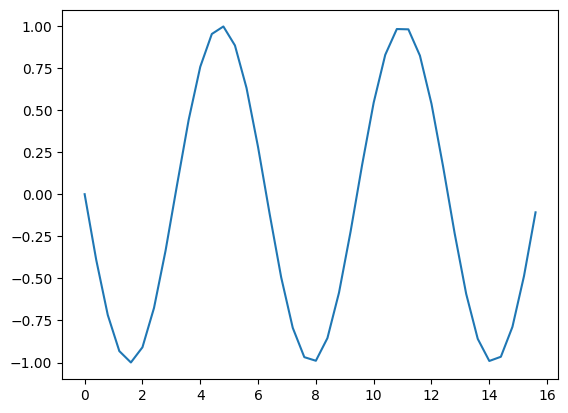

In [10]:
plt.plot(OCP_parameters_np_version["times"][:-1],np.array(U_a_d_values).flatten())

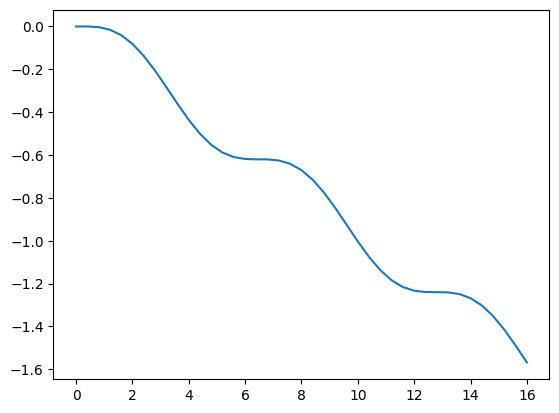

In [11]:
plt.plot(OCP_parameters_np_version["times"],np.array(q_d_vals).flatten())

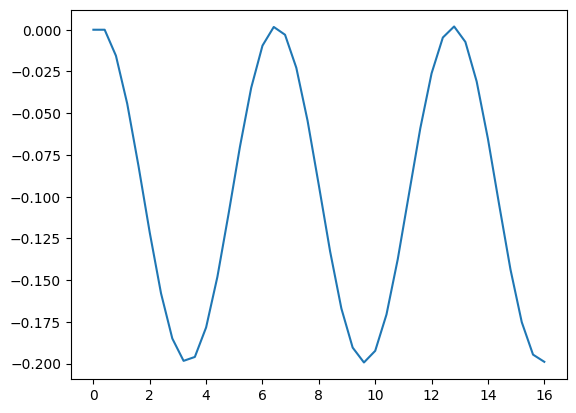

In [12]:
plt.plot(OCP_parameters_np_version["times"],v_d_sol.flatten())

# Standard solver

In [13]:
def running_cost_function(u,params):
    return u.dot(u)/2.

def terminal_cost(q,v,params):
    Aq = params["Aq"]
    Adq = params["Adq"]
    qT = params["qT"]
    dqT = params["dqT"]
    Delta_q = q-qT
    Delta_dq = v - dqT
    return Aq*Delta_q.dot(Delta_q) + Adq * Delta_dq.dot(Delta_dq)

def calculate_discrete_mech_dyn(U_a_d_part, U_b_d_part,params):
    q_d_vals = calculate_full_mech_trajectory(U_a_d_part,U_b_d_part)
    v_d_sol = calc_velocities_from_discrete_sol(q_d_vals,U_a_d_part,U_b_d_part,params)
    return q_d_vals,v_d_sol

def OCP_standard_def(u_d_stacked,params):
    '''supply u_d_stacked=U_a_d,U_b_d to calculate the objective function
    
    note: params not really indep of outside definition, for speed reasons already used to get compiled versions of mech dynamic
    '''
    cost = 0
    U_a_d_part, U_b_d_part = u_d_stacked.reshape([2,-1,1])
    step_size = params["h"]
    alpha = params["alpha"]
    for (ua,ub) in zip(U_a_d_part,U_b_d_part):
        cost += step_size* (alpha *running_cost_function(ua,params)+ (1-alpha)*running_cost_function(ub,params))

    q_d_vals, v_d_sol =calculate_discrete_mech_dyn(U_a_d_part,U_b_d_part,params)
    if len(q_d_vals) != len(v_d_sol):
        print("inconsistent velocity and position??")
    cost += terminal_cost(q_d_vals[-1],v_d_sol[-1],params)
    return cost



In [14]:
stackedUs = np.vstack([U_a_d_values,U_b_d_values]).flatten()
# OCP_standard_def(stackedUs,OCP_parameters_np_version)
ocp_standard_lambda = lambda x : OCP_standard_def(x,OCP_parameters_np_version)
standard_ocp_sol = opt.minimize(ocp_standard_lambda,stackedUs)

standard_ocp_sol = opt.minimize(ocp_standard_lambda,standard_ocp_sol.x)
Ua_standard_sol,Ub_standard_sol =  standard_ocp_sol.x.reshape([2,-1,1])
q_standard_sol, v_standard_sol = calculate_discrete_mech_dyn(Ua_standard_sol,Ub_standard_sol,OCP_parameters_np_version)

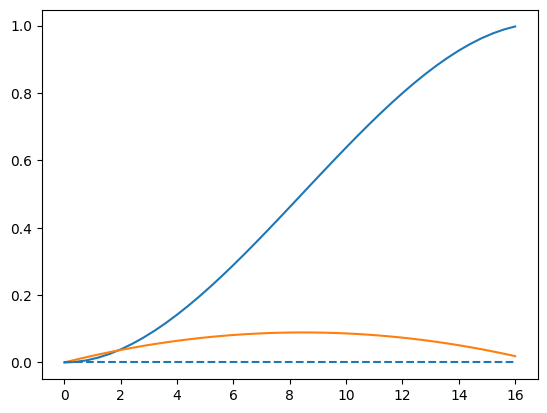

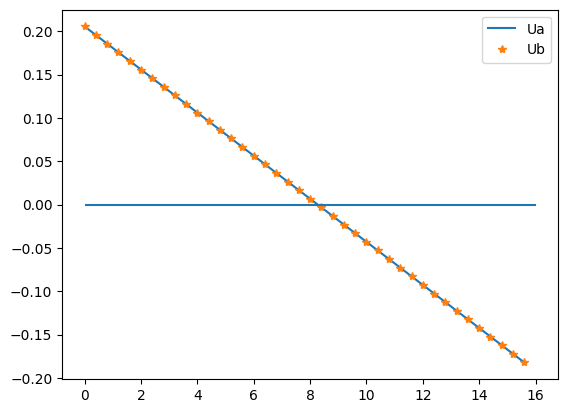

In [15]:
plt.plot(OCP_parameters_np_version["times"],np.array(q_standard_sol).flatten(),label='q')
plt.plot(OCP_parameters_np_version["times"],np.array(v_standard_sol).flatten(),label='v')
plt.hlines(y=0,xmin=0,xmax=OCP_parameters_np_version["times"][-1],linestyles='--')

plt.show()
plt.plot(OCP_parameters_np_version["times"][:-1],Ua_standard_sol.flatten(),label='Ua')
plt.plot(OCP_parameters_np_version["times"][:-1],Ua_standard_sol.flatten(),'*',label='Ub')
plt.hlines(y=0,xmin=0,xmax=OCP_parameters_np_version["times"][-1])
plt.legend()

# New Lagrangian approach

In [16]:
y = sympy.symbols("q_x,lambda_x")
v_y = sympy.symbols("v_x,v_lambda_x")
y_vec = sympy.Matrix(y)
v_y_vec = sympy.Matrix(v_y)
u = sympy.symbols("u_x,")
u_vec = sympy.Matrix(u)
p_y = sympy.Matrix(sympy.symbols("p_x,p_lambda_x"))

In [17]:

def control_Lagrangian(y,v_y,u,params):
    q_vec,lam_vec = y[:params["dim_q"]], y[params["dim_q"]:]
    v_q_vec, v_lam_vec = v_y[:params["dim_q"]], v_y[params["dim_q"]:]
    mech_Lagrangian_func = mech_Lagrangian(q_vec,v_q_vec,params)
    f_L_func = f_L(q_vec,v_q_vec,u,params)
    result = sympy.Matrix(sympy.derive_by_array(mech_Lagrangian_func,v_q_vec)).dot(v_lam_vec)
    result += sympy.Matrix(sympy.derive_by_array(mech_Lagrangian_func,q_vec)).dot(lam_vec)
    result += f_L_func.dot(lam_vec)
    result -= running_cost_function(u,params)
    return result
#use func always for the evaluated sympy symbol 
# (probably classes would be better/more natural here)

control_Lagrangian_function = control_Lagrangian(y_vec,v_y_vec,u_vec,OCP_parameters)
p_y_vec = sympy.Matrix(sympy.derive_by_array(control_Lagrangian_function,v_y_vec))
p_control_q_vec, p_control_lambda_vec = p_y_vec[:OCP_parameters["dim_q"]], p_y_vec[OCP_parameters["dim_q"]:]
v_y_as_p_y = sympy.solve([p_y_vec-p_y],v_y)
control_inverse_Legendre_v = sympy.Matrix([v_y_as_p_y[arg] for arg in v_y])


# Discrete control Lagrangian

In [18]:
y_d = []
U_a_d = []
U_b_d = []
for i in range(OCP_parameters["N"] + 1):
    y_k = sympy.symbols("q_x_" + str(i) + ",lambda_x_"+str(i)+"," )
    y_d.append(sympy.Matrix(y_k))
    U_a_k = sympy.symbols("U_a_" + str(i) + ",")
    U_a_d.append(sympy.Matrix(U_a_k))
    U_b_k = sympy.symbols("U_b_" + str(i) + ",")
    U_b_d.append(sympy.Matrix(U_b_k))
U_a_d = U_a_d[:-1]
U_b_d = U_b_d[:-1]    

y_k_1 = sympy.Matrix(sympy.symbols("q_x_k_m_1,lambda_x_k_m_1"))
y_k = sympy.Matrix(sympy.symbols("q_x_k,lambda_x_k"))
y_k1 = sympy.Matrix(sympy.symbols("q_x_k_1,lambda_x_k_1"))
Ua_k_1 = sympy.Matrix(sympy.symbols("U_a_k_m_1,"))
Ua_k = sympy.Matrix(sympy.symbols("U_a_k,"))
Ub_k_1 = sympy.Matrix(sympy.symbols("U_b_k_m_1,"))
Ub_k = sympy.Matrix(sympy.symbols("U_b_k,"))


In [19]:
def discrete_control_Lagrangian(y_k,y_k1,U_a_k,U_b_k,params):
    step_size = params["h"]
    alpha = params["alpha"]
    gamma = params["gamma"]
    y_weighted = weighted_sum(y_k,y_k1,gamma)
    y_1_weighted = weighted_sum(y_k,y_k1,1-gamma)
    y_finite_diff = finite_diff(y_k,y_k1,step_size)
    
    evaldic_yg = {x_tmp: y_tmp for (x_tmp,y_tmp) in zip(y,y_weighted)}
    evaldic_vy = {x_tmp: y_tmp for (x_tmp,y_tmp) in zip(v_y,y_finite_diff)}
    evaldic_Ua = {x_tmp:y_tmp for (x_tmp,y_tmp) in zip(u,U_a_k)}
    evaldic_y1_g = {x_tmp: y_tmp for (x_tmp,y_tmp) in zip(y,y_1_weighted)}
    evaldic_Ub = {x_tmp:y_tmp for (x_tmp,y_tmp) in zip(u,U_b_k)}
    evaldic_gammaL = evaldic_yg | evaldic_Ua | evaldic_vy 
    evaldic_1_gammaL = evaldic_y1_g | evaldic_Ub | evaldic_vy 
    result = step_size*alpha*control_Lagrangian_function.evalf(subs=evaldic_gammaL)
    result += step_size*(1-alpha)* control_Lagrangian_function.evalf(subs=evaldic_1_gammaL)
    # result = step_size * alpha * control_Lagrangian(y_weighted,y_finite_diff,U_a_k,params)
    # result += step_size * (1-alpha) * control_Lagrangian(y_1_weighted,y_finite_diff,U_b_k,params)
    return result


#Generate the discrete Lagrangians needed for the EL
evaldic_y_k_to_k_1 = {x_tmp: y_tmp for (x_tmp,y_tmp) in zip(y_k,y_k_1)}
evaldic_y_k1_to_k = {x_tmp: y_tmp for (x_tmp,y_tmp) in zip(y_k1,y_k)}
evaldic_Ua_k_to_k_1 = {x_tmp:y_tmp for (x_tmp,y_tmp) in zip(Ua_k,Ua_k_1)}
evaldic_Ub_k_to_k_1 = {x_tmp:y_tmp for (x_tmp,y_tmp) in zip(Ub_k,Ub_k_1)}
evaldic_k_to_k_1 = evaldic_y_k_to_k_1 |evaldic_y_k1_to_k |evaldic_Ua_k_to_k_1|evaldic_Ub_k_to_k_1


discrete_control_Lagrangian_func_k_k1 = discrete_control_Lagrangian(y_k,y_k1,Ua_k,Ub_k,OCP_parameters)
discrete_control_Lagrangian_func_k_1_k=discrete_control_Lagrangian_func_k_k1.evalf(subs=evaldic_k_to_k_1)    

In [20]:
#Discrete momenta and control DEL for k -1, k, k+1 evaluation
p_control_y_km = - sympy.Matrix(sympy.derive_by_array(discrete_control_Lagrangian_func_k_k1,y_k))
p_control_y_kp = sympy.Matrix(sympy.derive_by_array(discrete_control_Lagrangian_func_k_1_k,y_k))

control_DEL_k = -p_control_y_km+  p_control_y_kp
optimality_U_a_k = sympy.derive_by_array(discrete_control_Lagrangian_func_k_k1,Ua_k)
optimality_U_b_k = sympy.derive_by_array(discrete_control_Lagrangian_func_k_k1,Ub_k)


#control velocity as function of discrete control variables
v_y_k_as_discrete_ym =control_inverse_Legendre_v.evalf(subs={ tmp_1: tmp_2 for (tmp_1,tmp_2) in zip(p_y,p_control_y_km)})
v_y_k_as_discrete_yp =control_inverse_Legendre_v.evalf(subs={ tmp_1: tmp_2 for (tmp_1,tmp_2) in zip(p_y,p_control_y_kp)})

#calculate y_{k+1} from velocity (for initial value calculation)
y_k1_from_v_y_k_solver = sympy.solve(v_y_k_as_discrete_ym-sympy.Matrix(v_y), y_k1)
y_k1_from_v_y_k = sympy.Matrix([y_k1_from_v_y_k_solver[arg] for arg in y_k1])

p_control_y_km_lambdified = sympy.lambdify(list(y_k)+list(y_k1)+list(Ua_k) + list(Ub_k),p_control_y_km)
p_control_y_kp_lambdified = sympy.lambdify(list(y_k_1)+list(y_k)+list(Ua_k_1) + list(Ub_k_1),p_control_y_kp)


In [21]:

def p_y_d_from_solution(y_d,U_a_d,U_b_d,params):
    p_d = []
    for tmp1,tmp2,tmp3,tmp4 in zip(y_d[:-1],y_d[1:],U_a_d,U_b_d):
        p_d.append(p_control_y_km_lambdified(*tmp1,*tmp2,*tmp3,*tmp4))
    p_d.append(p_control_y_kp_lambdified(*y_d[-2],*y_d[-1],*U_a_d[-1],*U_b_d[-1])) 
    return p_d 
  



## FInally calculate the full ocp necessary optimality conditions from the new approach

In [22]:
# control_DEL_lambidified = sympy.lambdify(list(y_k_1)+list(y_k)+list(y_k1)+list(Ua_k_1)+list(Ua_k)+list( Ub_k_1)+list(Ub_k),control_DEL_k)
mu = sympy.Matrix(sympy.symbols("mu_x,"))
nu = sympy.Matrix(sympy.symbols("nu_x,"))



def new_objective_function(y_d,U_a_d,U_b_d,mu,nu,params):
    dict_yN={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k,y_d[-1])}
    dict_yN_1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k_1,y_d[-2])}
    dict_U_a_N_1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ua_k_1,U_a_d[-1])}
    dict_U_b_N_1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ub_k_1,U_b_d[-1])}
    full_dict = dict_yN|dict_yN_1| dict_U_a_N_1 | dict_U_b_N_1
    q_N,lambda_N = sympy.Matrix(y_d[-1][:params["dim_q"]]), sympy.Matrix(y_d[-1][params["dim_q"]:])
    v_y_N = v_y_k_as_discrete_yp.evalf(subs=full_dict)
    v_q_N = sympy.Matrix(v_y_N[:params["dim_q"]])
    objective = terminal_cost(q_N,sympy.Matrix(v_y_N[:params["dim_q"]]),params)

    for (yk_iter,yk1_iter,Uak_iter, Ubk_iter) in zip(y_d[:-1],y_d[1:],U_a_d,U_b_d):
        objective -= discrete_control_Lagrangian(yk_iter,yk1_iter,Uak_iter,Ubk_iter,params)

    dict_y0={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k,y_d[0])}
    dict_y1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k1,y_d[1])}
    dict_U_a_0={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ua_k,U_a_d[0])}
    dict_U_b_0={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ub_k,U_b_d[0])}
    full_dict = dict_y0|dict_y1| dict_U_a_0 | dict_U_b_0
    q_0,lambda_0 = sympy.Matrix(y_d[0][:params["dim_q"]]), sympy.Matrix(y_d[0][params["dim_q"]:])
    v_y_0 = v_y_k_as_discrete_ym.evalf(subs=full_dict)       
    v_q_0 = sympy.Matrix(v_y_0[:params["dim_q"]])
    objective += mu.dot(q_0 - params["q0"]) + nu.dot(sympy.Matrix(v_y_0[:params["dim_q"]])- params["dq0"])
    # print(v_q_0)
    #add here the partial integration terms
    D2f0 = sympy.Matrix(Dv_L_mech).evalf(subs=({tmp1:tmp2 for (tmp1,tmp2) in zip(q,q_0)}|{tmp1:tmp2 for (tmp1,tmp2) in zip(v_q,v_q_0)}))
    # print(D2f0)
    D2fN = sympy.Matrix(Dv_L_mech).evalf(subs=({tmp1:tmp2 for (tmp1,tmp2) in zip(q,q_N)}|{tmp1:tmp2 for (tmp1,tmp2) in zip(v_q,v_q_N)}))

    objective -= D2f0.dot(lambda_0)
    objective += D2fN.dot(lambda_N)

    return objective

full_explicit_new_objective_function = new_objective_function(y_d,U_a_d,U_b_d,mu,nu,OCP_parameters)

def OCP_new_approach_necessary_conditions(explicit_objective_function,y_d,U_a_d,U_b_d):
    '''
    signature of the data list (each element is flattened such that e.g. y_d = (y_0,y_1,...)=(q_x_0,q_y_0, lambda_x_0, lambda_y_0,q_x_1,...)):
    y_d, U_a_d, U_b_d, mu,nu
    '''
    eqs =[]
    for tmp in y_d:
        eqs.append(sympy.derive_by_array(explicit_objective_function,tmp).tomatrix().values())
    for tmp in U_a_d:
        eqs.append(sympy.derive_by_array(explicit_objective_function,tmp).tomatrix().values())
    for tmp in U_b_d:
        eqs.append(sympy.derive_by_array(explicit_objective_function,tmp).tomatrix().values())
    
    eqs.append(sympy.derive_by_array(explicit_objective_function,mu).tomatrix().values())
    eqs.append(sympy.derive_by_array(explicit_objective_function,nu).tomatrix().values())  
    flattened_list = []
    for tmp in eqs:
        for tmp2 in tmp:
            flattened_list.append(tmp2) 
    return flattened_list

necessary_optimality_conditions_func = OCP_new_approach_necessary_conditions(full_explicit_new_objective_function,y_d,U_a_d,U_b_d)

elements = [list(tmp) for tmp in y_d]
summed_args = []
for tmp in elements:
    summed_args += tmp

elements_U_a_d = [list(tmp) for tmp in U_a_d]
for tmp in elements_U_a_d:
    summed_args+=tmp

elements_U_b_d = [list(tmp) for tmp in U_b_d]
for tmp in elements_U_b_d:
    summed_args+=tmp
summed_args += list(mu)
summed_args += list(nu)
necessary_optimality_conditions_func_lambdify = sympy.lambdify(summed_args,necessary_optimality_conditions_func)

In [23]:
# necessary_optimality_conditions_func

In [24]:
y_d_vals = []
U_a_d_vals = []
U_b_d_vals = []

for i in range(len(y_d)):
    if i < len(y_d)-1:
        U_a_d_vals.append(Ua_standard_sol[i])
        U_b_d_vals.append(Ub_standard_sol[i])
        y_d_vals.append(np.array([q_standard_sol[i][0],U_a_d_vals[-1][0]]))
    else:
        y_d_vals.append(np.array([q_standard_sol[i][0],1.]))

y_d_vals=np.array(y_d_vals)
U_a_d_vals = np.array(U_a_d_vals)
U_b_d_vals = np.array(U_b_d_vals)


    # U_a_d_vals.append(np.array([0.001]))
    # U_b_d_vals.append(np.array([0.001]))
# U_a_d_vals = U_a_d_vals[:-1]
# U_b_d_vals = U_b_d_vals[:-1]    

mu_val = np.array([7.])
nu_val = np.array([8.])

stacked_vec = np.hstack([np.array(y_d_vals).flatten(), np.array(U_a_d_vals).flatten(),np.array(U_b_d_vals).flatten(), mu_val.flatten(),nu_val.flatten()] ).flatten()

def eval_necc_opt_condition(stacked_vec):
    crap_eval = necessary_optimality_conditions_func_lambdify(*stacked_vec)
    result_list = []
    for tmp in crap_eval:
        result_list += list(tmp.flatten())
    return  np.array(result_list)
    


In [25]:
def unstack_vector(stacked_vec,params):
    N_val = params["N"]
    dim_q = params["dim_q"]
    dim_u = params["dim_u"]

    y_d_vals = stacked_vec[:2*(N_val+1)*dim_q].reshape(-1,2)
    U_a_d_vals = stacked_vec[2*(N_val+1)*dim_q: 2*(N_val+1)*dim_q + N_val*dim_u].reshape(-1,1)
    U_b_d_vals = stacked_vec[ 2*(N_val+1)*dim_q + N_val*dim_u : 2* (N_val+1)*dim_q + 2*N_val*dim_u].reshape(-1,1)
    mu_vals = stacked_vec[2* (N_val+1)*dim_q + 2*N_val*dim_u: 2* (N_val+1)*dim_q + 2*N_val*dim_u + dim_q]
    nu_vals = stacked_vec[2* (N_val+1)*dim_q + 2*N_val*dim_u  + dim_q: 2* (N_val+1)*dim_q + 2*N_val*dim_u + 2*dim_q]

    return y_d_vals,U_a_d_vals,U_b_d_vals,mu_vals,nu_vals

# testing = np.array(y_d_vals[:5])
# print(testing)
# print(testing.flatten())
# print(testing.flatten().reshape((-1,2)))

# unstack_vector(stacked_vec,OCP_parameters_np_version)[0]

## Solve here the ocp via the new method by finding solution of the necessary optimality conditions

In [26]:
new_ocp_eval = lambda x: np.array(necessary_optimality_conditions_func_lambdify(*x))
new_ocp_result = opt.root(eval_necc_opt_condition,stacked_vec,method='lm',tol=1e-10)


## now need to extract the solution curves
we also need to calculate $$\lambda_N,\lambda_0$$ from the solution 
to correctly calculate the momenta etc

In [27]:
def get_boundary_lambda_from_solution(params):
    dict_yN={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k,y_d[-1])}
    dict_yN_1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k_1,y_d[-2])}
    dict_U_a_N_1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ua_k_1,U_a_d[-1])}
    dict_U_b_N_1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ub_k_1,U_b_d[-1])}
    full_dict = dict_yN|dict_yN_1| dict_U_a_N_1 | dict_U_b_N_1
    q_N,lambda_N = sympy.Matrix(y_d[-1][:params["dim_q"]]), sympy.Matrix(y_d[-1][params["dim_q"]:])
    v_y_N = v_y_k_as_discrete_yp.evalf(subs=full_dict)
    v_q_N = sympy.Matrix(v_y_N[:params["dim_q"]]) 
    terminal_cost_deriv = sympy.Matrix(sympy.derive_by_array(terminal_cost(q,v_q,params),v_q)).evalf(subs={tmp1:tmp2 for (tmp1,tmp2) in zip(v_q,v_q_N)})
    D_22_mech_L = sympy.Matrix(sympy.derive_by_array(sympy.derive_by_array(mech_Lagrangian_func,v_q),v_q)).evalf(subs={tmp1:tmp2 for (tmp1,tmp2) in zip(v_q,v_q_N)})
    eq_to_solve = terminal_cost_deriv + lambda_N.transpose()@ D_22_mech_L
    end_solve = sympy.solve(eq_to_solve,lambda_N)
    lambda_N_vec_result = sympy.Matrix([end_solve[tmp] for tmp in lambda_N])

    #here the 0 side...
    dict_y0={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k,y_d[0])}
    dict_y1={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(y_k_1,y_d[1])}
    dict_U_a_0={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ua_k,U_a_d[0])}
    dict_U_b_0={tmp_1:tmp_2 for (tmp_1,tmp_2) in zip(Ub_k,U_b_d[0])}
    full_dict = dict_y0|dict_y1| dict_U_a_0 | dict_U_b_0
    q_0,lambda_0 = sympy.Matrix(y_d[-1][:params["dim_q"]]), sympy.Matrix(y_d[-1][params["dim_q"]:])
    v_y_0 = v_y_k_as_discrete_ym.evalf(subs=full_dict)
    v_q_0 = sympy.Matrix(v_y_0[:params["dim_q"]])

    D_22_mech_L = sympy.Matrix(sympy.derive_by_array(sympy.derive_by_array(mech_Lagrangian_func,v_q),v_q)).evalf(subs={tmp1:tmp2 for (tmp1,tmp2) in zip(v_q,v_q_0)})
    eq_to_solve = nu - lambda_0.transpose()@ D_22_mech_L
    start_solve = sympy.solve(eq_to_solve,lambda_0)
    lambda_0_vec_result = sympy.Matrix([start_solve[tmp] for tmp in lambda_0])
    
    return lambda_0_vec_result, lambda_N_vec_result





    
boundary_lambda_func = get_boundary_lambda_from_solution(OCP_parameters_np_version)   

boundary_lambda_func_lambdify = sympy.lambdify(summed_args,boundary_lambda_func)


In [28]:
#calc here all relevant soljution elements and also the initial and final lambda in its correct form
y_d_sol, u_a_d_sol, u_b_d_sol,mu_sol,nu_sol = unstack_vector(new_ocp_result.x,OCP_parameters_np_version)
boundary_lambda_calc = boundary_lambda_func_lambdify(*new_ocp_result.x)
y_d_sol[0] = np.concatenate([y_d_sol[0][:OCP_parameters_np_version["dim_q"]],boundary_lambda_calc[0].flatten()])
y_d_sol[-1] = np.concatenate([y_d_sol[-1][:OCP_parameters_np_version["dim_q"]],boundary_lambda_calc[1].flatten()])

p_y_d_sol = np.array(p_y_d_from_solution(y_d_sol,u_a_d_sol,u_b_d_sol,OCP_parameters_np_version)).transpose()[0]

# PLot the graphs here for visualization

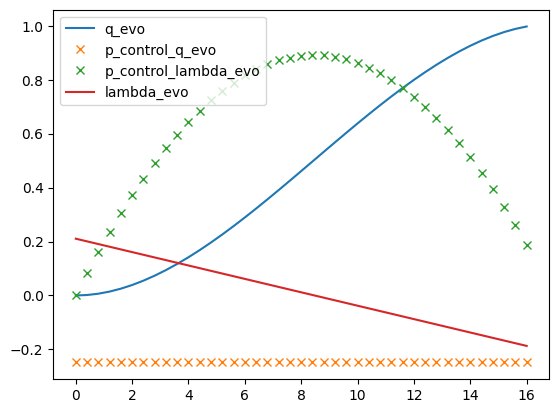

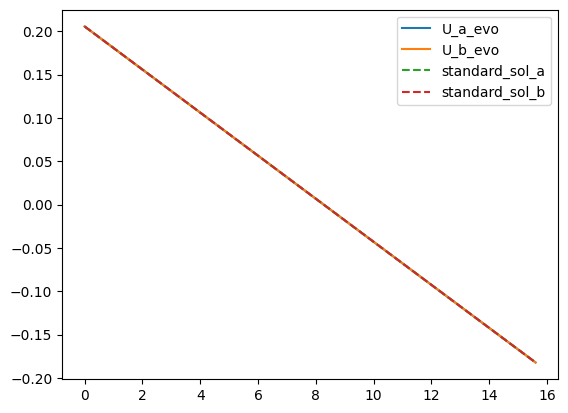

In [29]:
times_vec = OCP_parameters_np_version["times"]
plt.plot(times_vec,y_d_sol.transpose()[0].flatten(),label="q_evo")
plt.plot(times_vec,p_y_d_sol[0].flatten(),'x',label="p_control_q_evo")
plt.plot(times_vec,p_y_d_sol[1].flatten(),'x',label="p_control_lambda_evo")
plt.plot(times_vec,y_d_sol.transpose()[1].flatten(), label="lambda_evo")
plt.legend()
plt.show()
plt.plot(times_vec[:-1],u_a_d_sol.flatten(), label = "U_a_evo")
plt.plot(times_vec[:-1],u_b_d_sol.flatten(), label = "U_b_evo")
plt.plot(times_vec[:-1],Ua_standard_sol.flatten(),'--', label = "standard_sol_a")
plt.plot(times_vec[:-1],Ub_standard_sol.flatten(),'--', label = "standard_sol_b")

plt.legend()



# Here the results will be saved in files to then have another jupyter notebook for the analysis